In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the IRIS dataset
iris = load_iris()
data = iris.data  # Only features
target = iris.target  # Target labels

In [5]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target

# Print the original data
print("Original Data:")
df.head()

Original Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Print the scaled data
print("\nScaled Data:")
print(pd.DataFrame(scaled_data, columns=iris.feature_names).head())


Scaled Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [7]:
# Step 3: Calculate the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# Print the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)


Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the number of eigenvalues and eigenvectors
print("\nNumber of Eigenvalues:", len(eigenvalues))
print("Number of Eigenvectors:", eigenvectors.shape[1])

# Print eigenvalues and their corresponding eigenvectors
print("\nEigenvalues and their corresponding Eigenvectors:")
for i, (eigenvalue, eigenvector) in enumerate(zip(sorted_eigenvalues, sorted_eigenvectors.T)):
    print(f"The eigenvector {eigenvector} corresponds to the eigenvalue {eigenvalue}")


Number of Eigenvalues: 4
Number of Eigenvectors: 4

Eigenvalues and their corresponding Eigenvectors:
The eigenvector [ 0.52106591 -0.26934744  0.5804131   0.56485654] corresponds to the eigenvalue 2.9380850501999936
The eigenvector [-0.37741762 -0.92329566 -0.02449161 -0.06694199] corresponds to the eigenvalue 0.920164904162486
The eigenvector [-0.71956635  0.24438178  0.14212637  0.63427274] corresponds to the eigenvalue 0.1477418210449473
The eigenvector [ 0.26128628 -0.12350962 -0.80144925  0.52359713] corresponds to the eigenvalue 0.020853862176462613


In [11]:
# Step 5: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_eigenvalues)

[2.93808505 0.9201649  0.14774182 0.02085386]


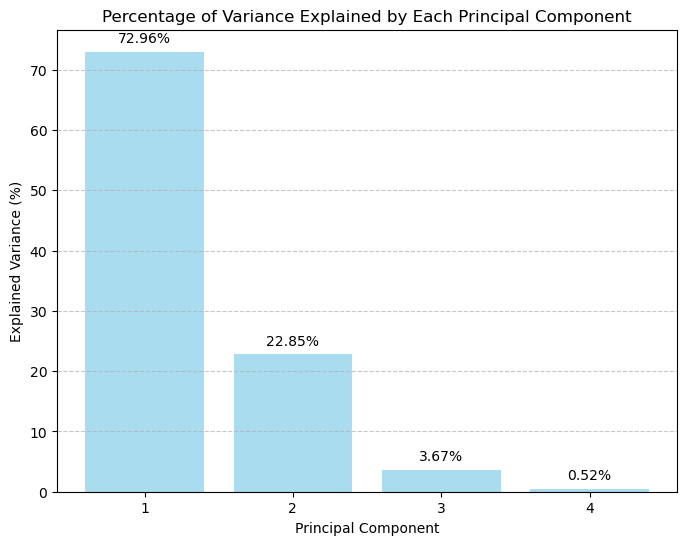

In [14]:
# Step 6: Calculate explained variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100

# Step 7: Bar Plot with % Variance
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(sorted_eigenvalues) + 1), explained_variance_percentage, color='skyblue', alpha=0.7)
plt.title('Percentage of Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

# Add % variance on top of each bar
for bar, variance in zip(bars, explained_variance_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{variance:.2f}%', ha='center', va='bottom')

plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

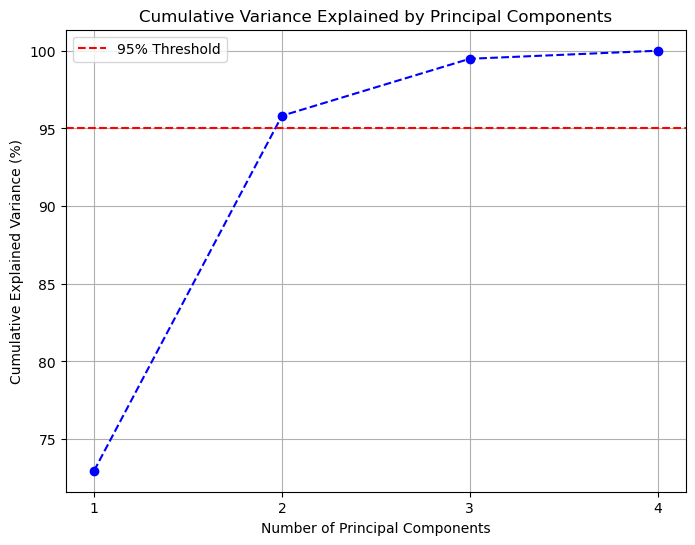

In [15]:
# Cumulative Variance Plot
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid()
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()


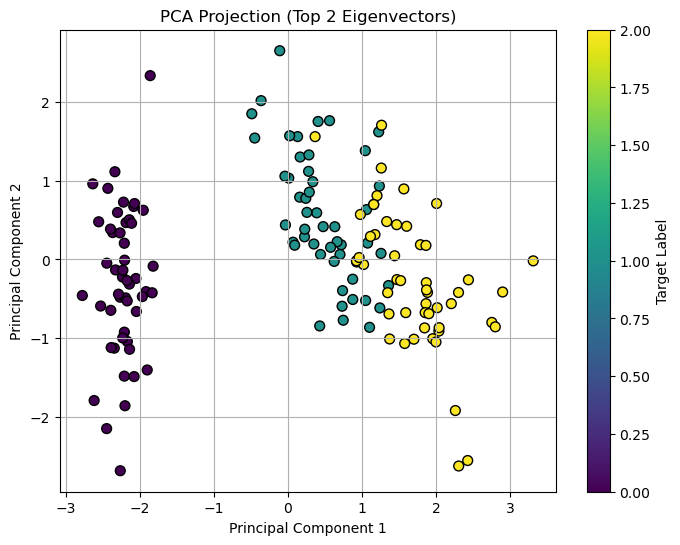

In [16]:
# Final PCA Plot
top_2_eigenvectors = sorted_eigenvectors[:, :2]
projected_data_2 = np.dot(scaled_data, top_2_eigenvectors)
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_2[:, 0], projected_data_2[:, 1], c=target, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Projection (Top 2 Eigenvectors)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.colorbar(label='Target Label')
plt.show()

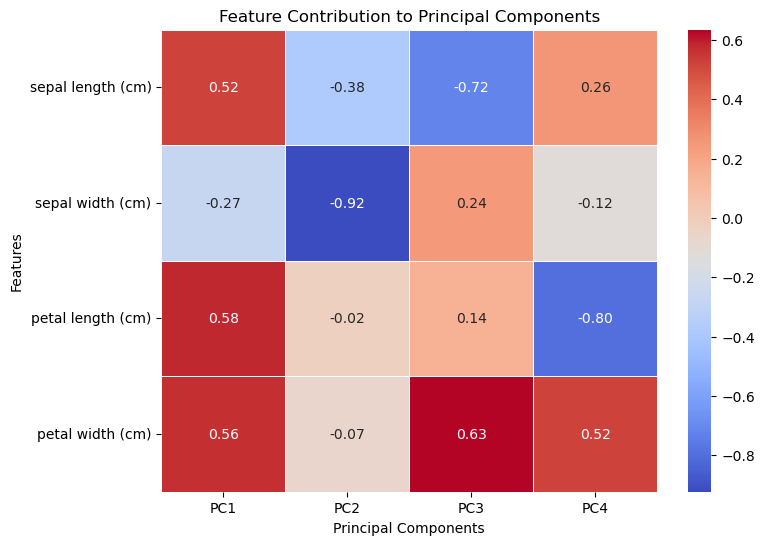

In [17]:
import seaborn as sns

# Heatmap of PC-Feature Correlation
pc_feature_correlation = sorted_eigenvectors

# Create a DataFrame for better visualization
pc_feature_df = pd.DataFrame(
    pc_feature_correlation,
    columns=[f'PC{i+1}' for i in range(pc_feature_correlation.shape[1])],
    index=iris.feature_names
)

plt.figure(figsize=(8, 6))
sns.heatmap(pc_feature_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Contribution to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


C:\Users\Milan\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Original Data Shape: (5000, 784)
Scaled Data Shape: (5000, 784)

SVD Components:
U Shape: (5000, 784)
S (Singular Values) Shape: (784,)
VT Shape: (784, 784)

Explained Variance Ratios (Top 10):
[0.06046037 0.04455229 0.04002766 0.0317796  0.0273781  0.02407319
 0.02110144 0.0189289  0.01701807 0.0153199 ]


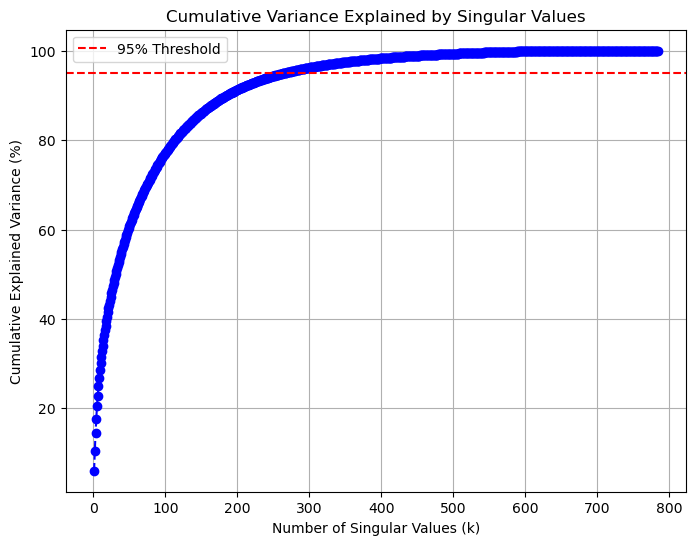

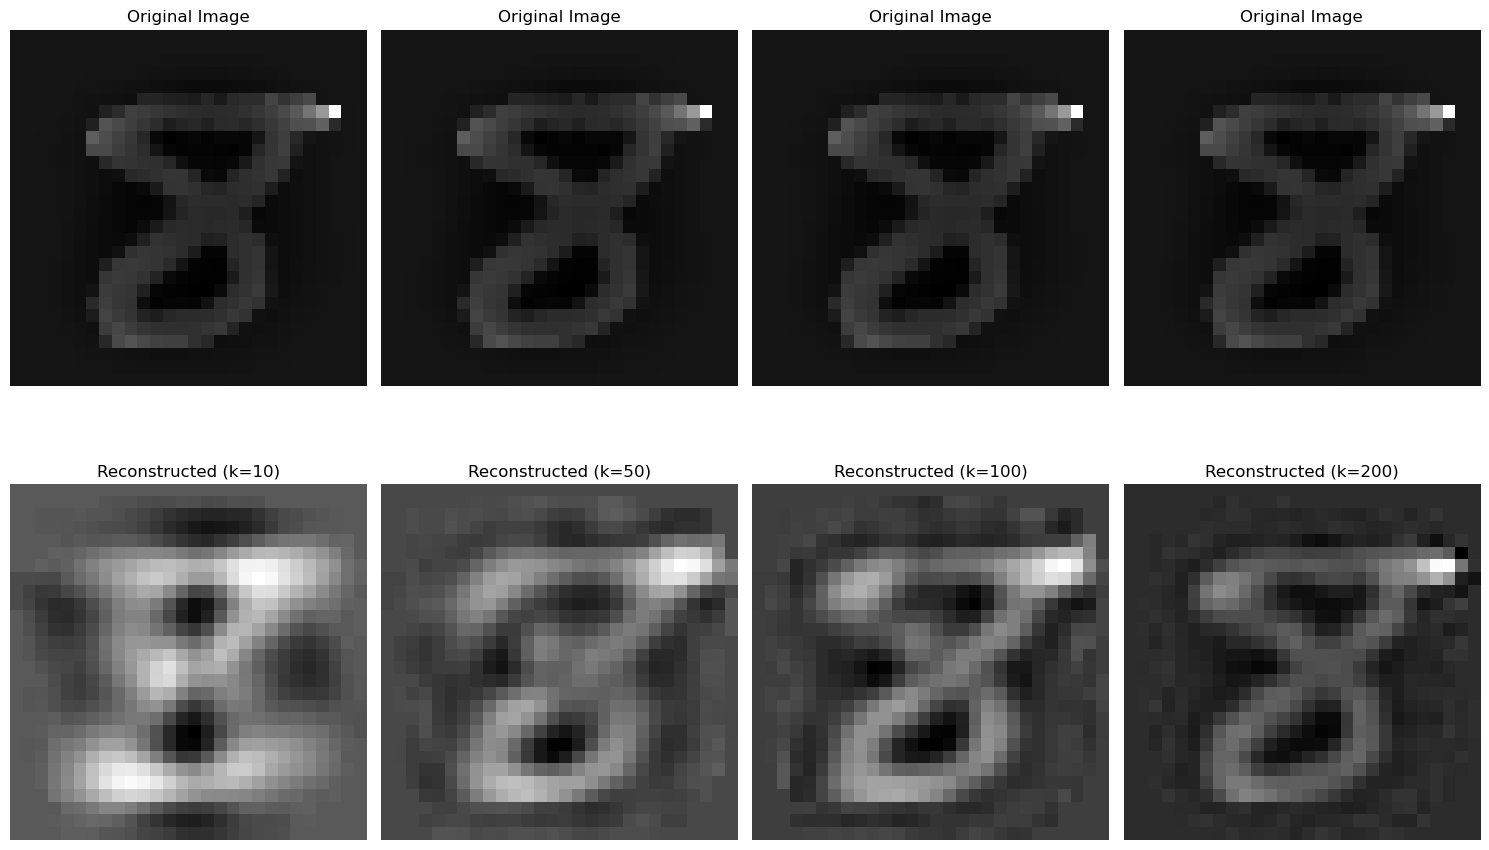

In [18]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = shuffle(mnist.data, mnist.target, random_state=42)

# Use a subset of data for efficiency
X = X[:5000]  # Subset to 5000 samples
y = y[:5000]

# Print the shape of the data
print("Original Data Shape:", X.shape)

# Step 2: Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Print scaled data shape
print("Scaled Data Shape:", X_scaled.shape)

# Step 3: Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

# Print the shapes of U, S, and VT
print("\nSVD Components:")
print("U Shape:", U.shape)
print("S (Singular Values) Shape:", S.shape)
print("VT Shape:", VT.shape)

# Step 4: Calculate explained variance
explained_variance = (S**2) / (len(X_scaled) - 1)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Print explained variance ratios
print("\nExplained Variance Ratios (Top 10):")
print(explained_variance_ratio[:10])

# Step 5: Plot Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Singular Values')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid()
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

# Step 6: Project data for different k values and visualize reconstruction
k_values = [10, 50, 100, 200]
reconstructions = {}

for k in k_values:
    # Reconstruct the data with k singular values/vectors
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    X_reconstructed = np.dot(U_k, np.dot(S_k, VT_k))
    reconstructions[k] = X_reconstructed

# Visualize original vs reconstructed images for different k
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    plt.subplot(2, len(k_values), i + 1)
    plt.imshow(X_scaled[0].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, len(k_values), i + 1 + len(k_values))
    plt.imshow(reconstructions[k][0].reshape(28, 28), cmap='gray')
    plt.title(f"Reconstructed (k={k})")
    plt.axis('off')

plt.tight_layout()
plt.show()
